In [14]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

# Logistic Regression

## Read the dataset

In [2]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col='PassengerId'
)

In [3]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


## Data Preprocessing

In [4]:
# Seperate independent and dependent variables
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:,:-1], dataset_arr[:,-1]

In [5]:
# Adding bias to X
intercept = np.ones((
    X.shape[0], 1
))
X_b = np.concatenate(
    (intercept, X),
    axis = 1
)

In [6]:
# Train, val, test split with proportion 7:2:1
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

In [7]:
# Data Standardization
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.fit_transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.fit_transform(X_test[:, 1:])

In [8]:
# Building sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Predict fuction
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)

    return y_hat

# Computing loss with cross-entropy
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat,
                    1e-7, 1 - 1e-7)
    
    return (-y * np.log(y_hat) - (1 - y)* np.log(1 - y_hat)).mean()

# Computing gradient
def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

# Updating theta
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

# Estimating accuracy
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc

In [9]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(
    size = X_train.shape[1]
)

In [10]:
# Initialize lists to store metrics
train_accs = []
train_losses = []
val_accs = []
val_losses = []

# Loop through each epoch
for epoch in range(epochs):
    # Initialize lists to store batch-wise metrics
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    # Loop through each batch in the training data
    for i in range(0, X_train.shape[0], batch_size):
        # Select a batch of data
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        # Make predictions and compute loss for the batch
        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)

        # Compute gradients and update the model parameters
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        # Append the batch loss and accuracy to the respective lists
        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        # Evaluate the model on the validation set
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    # Calculate average metrics for the epoch
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    # Append the average metrics to the lists
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    # Print the results for the current epoch
    print(f'\nEpoch {epoch + 1}:'
          f'\tTraining loss: {train_batch_loss:.3f}'
          f'\tValidation loss: {val_batch_loss:.3f}')



Epoch 1:	Training loss: 0.703	Validation loss: 0.626

Epoch 2:	Training loss: 0.670	Validation loss: 0.604

Epoch 3:	Training loss: 0.640	Validation loss: 0.585

Epoch 4:	Training loss: 0.614	Validation loss: 0.569

Epoch 5:	Training loss: 0.592	Validation loss: 0.555

Epoch 6:	Training loss: 0.572	Validation loss: 0.543

Epoch 7:	Training loss: 0.554	Validation loss: 0.533

Epoch 8:	Training loss: 0.539	Validation loss: 0.525

Epoch 9:	Training loss: 0.526	Validation loss: 0.518

Epoch 10:	Training loss: 0.514	Validation loss: 0.513

Epoch 11:	Training loss: 0.504	Validation loss: 0.508

Epoch 12:	Training loss: 0.495	Validation loss: 0.504

Epoch 13:	Training loss: 0.487	Validation loss: 0.502

Epoch 14:	Training loss: 0.480	Validation loss: 0.499

Epoch 15:	Training loss: 0.474	Validation loss: 0.497

Epoch 16:	Training loss: 0.468	Validation loss: 0.496

Epoch 17:	Training loss: 0.463	Validation loss: 0.495

Epoch 18:	Training loss: 0.459	Validation loss: 0.494

Epoch 19:	Training

## Plot the result

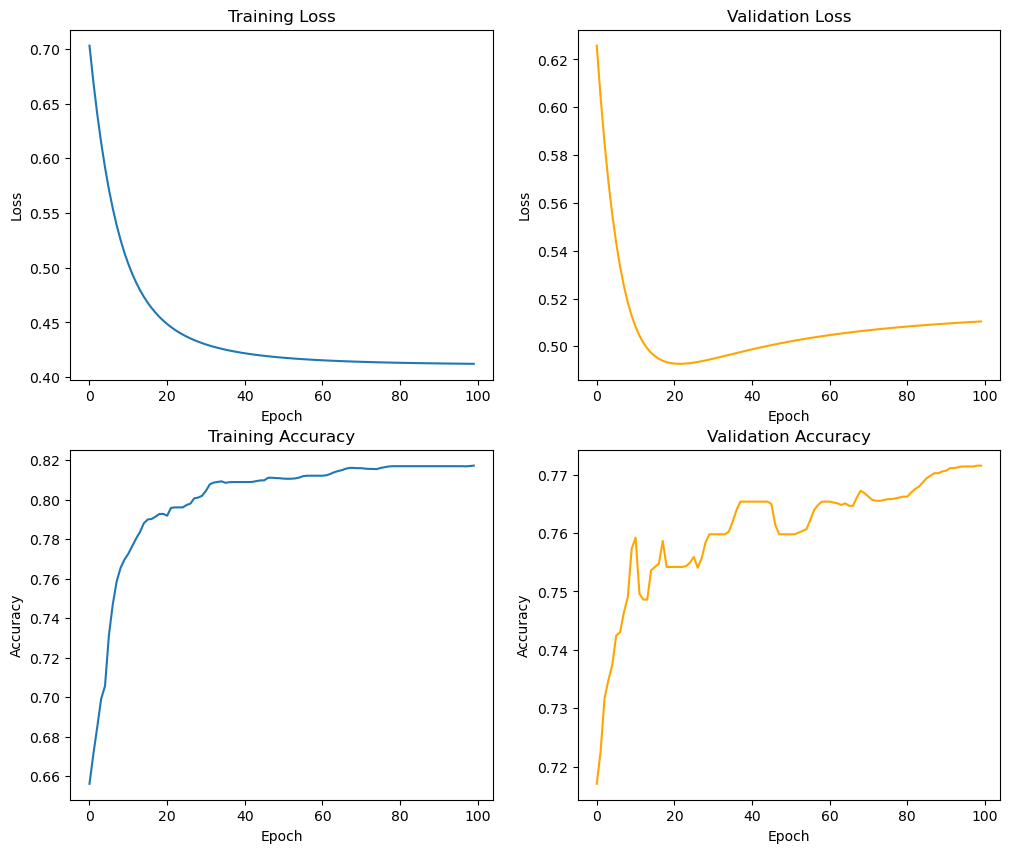

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot training loss
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss', title='Training Loss')

# Plot validation loss
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss', title='Validation Loss')

# Plot training accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy', title='Training Accuracy')

# Plot validation accuracy
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy', title='Validation Accuracy')
plt.show()


In [13]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.776536312849162
Accuracy: 0.7752808988764045


# Twitter Sentiment Analysis

## Read the dataset

In [31]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(dataset_path, index_col = 'id')

In [16]:
df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


## Data Cleaning

In [32]:
def text_normalize(text):
    '''This function used to normalize text by removed acronyms, hyperlinks, hashtags and punctuation'''
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Hashtags removal
    text = re.sub(r'#', '', text)

    # Punctuation removal
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokenizer = TweetTokenizer(
        preserve_case=False,
        strip_handles=True,
        reduce_len=True
    )
    text_tokens = tokenizer.tokenize(text)

    return text_tokens

def get_freqs(df):
    '''Return the frequency of a word appeared for each label'''
    freqs = defaultdict(lambda: 0)
    for _, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']
        
        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs

def get_feature(text, freqs):
    tokens = text_normalize(text)
    
    X = np.zeros(3) #intercept, n_positive, n_negative
    X[0] = 1
    
    for token in tokens:
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]
    
    return X



In [33]:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']
    
    X_i = get_feature(tweet, freqs)
    
    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)


In [35]:
# Train, val, test split with proportion 7:2:1
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

In [36]:
# Data Normalization
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [40]:
lr = 0.01
epochs = 200
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(
    size = X_train.shape[1]
)

In [41]:
# Initialize lists to store metrics
train_accs = []
train_losses = []
val_accs = []
val_losses = []

# Loop through each epoch
for epoch in range(epochs):
    # Initialize lists to store batch-wise metrics
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    # Loop through each batch in the training data
    for i in range(0, X_train.shape[0], batch_size):
        # Select a batch of data
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        # Make predictions and compute loss for the batch
        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)

        # Compute gradients and update the model parameters
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        # Append the batch loss and accuracy to the respective lists
        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        # Evaluate the model on the validation set
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    # Calculate average metrics for the epoch
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    # Append the average metrics to the lists
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    # Print the results for the current epoch
    print(f'\nEpoch {epoch + 1}:'
          f'\tTraining loss: {train_batch_loss:.3f}'
          f'\tValidation loss: {val_batch_loss:.3f}')



Epoch 1:	Training loss: 0.594	Validation loss: 0.592

Epoch 2:	Training loss: 0.476	Validation loss: 0.475

Epoch 3:	Training loss: 0.442	Validation loss: 0.440

Epoch 4:	Training loss: 0.426	Validation loss: 0.424

Epoch 5:	Training loss: 0.417	Validation loss: 0.415

Epoch 6:	Training loss: 0.411	Validation loss: 0.408

Epoch 7:	Training loss: 0.406	Validation loss: 0.403

Epoch 8:	Training loss: 0.402	Validation loss: 0.399

Epoch 9:	Training loss: 0.399	Validation loss: 0.395

Epoch 10:	Training loss: 0.396	Validation loss: 0.392

Epoch 11:	Training loss: 0.394	Validation loss: 0.390

Epoch 12:	Training loss: 0.392	Validation loss: 0.387

Epoch 13:	Training loss: 0.390	Validation loss: 0.386

Epoch 14:	Training loss: 0.389	Validation loss: 0.384

Epoch 15:	Training loss: 0.387	Validation loss: 0.382

Epoch 16:	Training loss: 0.386	Validation loss: 0.381

Epoch 17:	Training loss: 0.385	Validation loss: 0.380

Epoch 18:	Training loss: 0.384	Validation loss: 0.379

Epoch 19:	Training

In [42]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.8263888888888888
Accuracy: 0.8459595959595959
